In [1]:
import numpy as np

class GeneStruct:
    def __init__(self, name, description, organism):
        self.name = name
        self.description = description
        self.organism = organism
        self.seq = ""
        

class FastaGeneReader:
    def __init__(self):
        self.gene_list = None
        self.file_name = None
    
    def read_from_file(self, file):
        self.file_name = file
        self.gene_list = []
        
        with open(file) as fin:
            
            for line in fin.readlines():
                if line[0] == '>':
                    blank_idx = line.find(' ')
                    
                    org_idx = line.find('[')
                    
                    gene = GeneStruct(
                        line[1:blank_idx],
                        line[blank_idx+1:org_idx].strip(),
                        line[org_idx:].strip(),
                    )
                    self.gene_list.append(gene)
                else:
                    self.gene_list[-1].seq += line.strip()

In [ ]:
os.path.exist

In [2]:
import os
readers = []
for filename in os.listdir("dataset"):
    if(filename[0]!='.'):
        r = FastaGeneReader()
        r.read_from_file("dataset/"+filename)
        readers.append(r)
        
organism_set_list = []

for r in readers:
    s = set()
    for gene_struct in r.gene_list:
        s.add(gene_struct.organism)
        # s.add(gene_struct.organism.split(' ')[0][1:])
    organism_set_list.append(s)
    
organism_count_dict = {}
for organism_set in organism_set_list[1:]:
    for organism in organism_set:
        organism_count_dict[organism] = organism_count_dict.get(organism, 0) + 1
        
candidate_organisms = [k for k, v in organism_count_dict.items() if v>=8]

In [3]:
len(candidate_organisms)

25

In [4]:
r_list = []
for r in readers:
    num = 0
    c = candidate_organisms.copy()
    for gene_struct in r.gene_list:
        if gene_struct.organism in c:
            num += 1
            c.remove(gene_struct.organism)
    r_list.append((num, r))
    
readers = [b for a,b in sorted(r_list, key=lambda x:x[0])[-8:]]

In [103]:
readers

In [5]:
readers[4].gene_list[1].name

'AKI72283.1'

In [8]:
organism_set_list = []

for r in readers:
    s = set()
    for gene_struct in r.gene_list:
        s.add(gene_struct.organism)
        # s.add(gene_struct.organism.split(' ')[0][1:])
    organism_set_list.append(s)
    
organism_count_dict = {}
for organism_set in organism_set_list[1:]:
    for organism in organism_set:
        organism_count_dict[organism] = organism_count_dict.get(organism, 0) + 1
        
candidate_organisms = [k for k, v in organism_count_dict.items() if v>=7]
candidate_organisms

['[Chlorocebus sabaeus]',
 '[Trachypithecus francoisi]',
 '[Theropithecus gelada]',
 '[Macaca nemestrina]',
 '[Macaca fascicularis]',
 '[Colobus angolensis palliatus]',
 '[Callithrix jacchus]',
 '[Papio anubis]',
 '[Homo sapiens]',
 '[Saimiri boliviensis boliviensis]']

In [224]:
organisms = [
 '[Homo sapiens]',
 '[Chlorocebus sabaeus]',
 '[Trachypithecus francoisi]',
 # '[Theropithecus gelada]',
 '[Macaca nemestrina]',
 '[Macaca fascicularis]',
 '[Colobus angolensis palliatus]',
 '[Callithrix jacchus]',
 '[Papio anubis]',

 # '[Saimiri boliviensis boliviensis]'
]
len(readers)

d = {}

for r in readers:
    d[r.file_name] = {}
    for gene_struct in r.gene_list: 
        if gene_struct.organism in organisms:
            d[r.file_name][gene_struct.organism] = gene_struct

In [238]:
# format_ = r'''\begin{subfigure}{.4\textwidth}
#     \centering
#     \includegraphics[width=.6\linewidth]{%s.jpeg}
#     \caption{%s}
#     \label{fig:%s}
# \end{subfigure}'''
# for i, ss in enumerate(organisms):
#     s = ss.strip("[]")
#     print(format_% (s, s, s))

In [218]:
[len(v) for k,v in d.items()]

[8, 8, 8, 8, 8, 8, 8, 8]

In [31]:
[k for k,v in d.items()]

['dataset/BAA04809.1.txt',
 'dataset/AAA52484.1.txt',
 'dataset/AAK26441.1.txt',
 'dataset/NP_001027466.1.txt',
 'dataset/KAI4083901.1.txt',
 'dataset/AAB60937.1.txt',
 'dataset/AAN17825.1.txt',
 'dataset/KAI4030570.1.txt']

In [64]:
organisms

['[Chlorocebus sabaeus]',
 '[Trachypithecus francoisi]',
 '[Macaca nemestrina]',
 '[Macaca fascicularis]',
 '[Colobus angolensis palliatus]',
 '[Callithrix jacchus]',
 '[Papio anubis]',
 '[Homo sapiens]']

In [30]:
import Bio
import Bio.AlignIO

In [83]:
from Bio import SeqIO
result_record_list = []

import re

def parse_organism(r):
    import re
    return re.search(r"\[.*\]", r.description).group(0)

for i, (file_name, v_list) in enumerate(d.items()):
    local_organisms = organisms.copy()
    records = list(SeqIO.parse(file_name, "fasta"))
    for r in records:
        org_name = re.search(r"\[.*\]", r.description).group(0)
        if org_name in local_organisms:
            local_organisms.remove(org_name)
            r.annotations["group"] = str(i)
            result_record_list.append(r)
    
from Bio import SeqIO
with open("64_samples.fasta", "w") as output_handle:
    SeqIO.write(result_record_list, output_handle, "fasta")
    

In [140]:
from Bio import SeqIO
result_record_list = []

import re

for i, (file_name, v_list) in enumerate(d.items()):
    local_record_list = []
    local_organisms = organisms.copy()
    records = list(SeqIO.parse(file_name, "fasta"))
    for r in records:
        org_name = re.search(r"\[.*\]", r.description).group(0)
        if org_name in local_organisms:
            local_organisms.remove(org_name)
            r.annotations["group"] = str(i)
            local_record_list.append(r)
            result_record_list.append(r)
    
    from Bio import SeqIO
    with open("%s.fasta" % i, "w") as output_handle:
        SeqIO.write(local_record_list, output_handle, "fasta")


In [30]:
import re

def parse_organism(r):
    import re
    return re.search(r"\[.*\]", r.description).group(0)


from Bio import SeqIO
result_record_list = []
with open("64_samples.fasta", "r") as input_handle:
    for r in SeqIO.parse(input_handle, "fasta"):
        result_record_list.append(r)
protein_idx_dict = {}
for i, r in enumerate(result_record_list):
    protein_idx_dict[r.name] = i

In [15]:
import Bio.Blast.Applications

from Bio.Blast.Applications import NcbiblastpCommandline

# dir(Bio.Blast.Applications.)
# NcbiblastpCommandline()
s = "/usr/local/ncbi/blast/bin/blastp -subject 64_samples.fasta -query 64_samples.fasta -out test0.out -outfmt 10  -max_target_seqs 64"
import os
os.system(s)



0

In [16]:
import pandas as pd

df = pd.read_csv("test0.out", header=None)

In [19]:
import numpy as np
similarity_matrix = np.zeros((len(result_record_list), len(result_record_list)))
score_hit_matrix = np.zeros((len(result_record_list), len(result_record_list)))



for i in range(df.shape[0]):
    src = df.loc[i, 0]
    dst = df.loc[i, 1]
    similarity_matrix[protein_idx_dict[src], protein_idx_dict[dst]] = df.loc[i, 2]
    score_hit_matrix[protein_idx_dict[src], protein_idx_dict[dst]] = df.loc[i, 11]
    
for i in range(len(result_record_list)):
    score_hit_matrix[i, :] /=  score_hit_matrix[i, i]

In [156]:
import Bio.Cluster
z_cluster = Bio.Cluster.kmedoids(1-score_hit_matrix, nclusters=8, npass=1, initialid=None)
unique, counts = np.unique(z_cluster[0], return_counts=True)
unique, counts, z_cluster[1]


(array([ 3, 11, 22, 23, 27, 45, 49, 59], dtype=int32),
 array([11,  8,  4,  4,  8,  8,  8, 13]),
 10.92127874189802)

In [100]:
import Bio.Cluster
z = Bio.Cluster.kmedoids(1-score_hit_matrix, nclusters=8, npass=1, initialid=None)
unique, counts = np.unique(z[0], return_counts=True)
unique, counts, z[1]


(array([11, 23, 27, 33, 45, 48, 49, 59], dtype=int32),
 array([ 8,  8, 15,  9,  8,  1,  7,  8]),
 11.690092481942711)

In [104]:
import Bio.Cluster
z = Bio.Cluster.kmedoids(1-score_hit_matrix, nclusters=8, npass=100, initialid=None)
unique, counts = np.unique(z[0], return_counts=True)
unique, counts, z[1]


(array([ 1, 11, 23, 27, 33, 45, 49, 59], dtype=int32),
 array([8, 8, 8, 8, 8, 8, 8, 8]),
 4.075580010969761)

In [108]:
import Bio.Cluster
z = Bio.Cluster.kmedoids(1-score_hit_matrix, nclusters=8, npass=100, initialid=None)
unique, counts = np.unique(z[0], return_counts=True)
unique, counts, z[1]


(array([ 1, 11, 23, 27, 33, 45, 49, 59], dtype=int32),
 array([8, 8, 8, 8, 8, 8, 8, 8]),
 4.075580010969761)

In [107]:
z[0].reshape((8,8))

array([[ 1,  1,  1,  1,  1,  1,  1,  1],
       [11, 11, 11, 11, 11, 11, 11, 11],
       [23, 23, 23, 23, 23, 23, 23, 23],
       [27, 27, 27, 27, 27, 27, 27, 27],
       [33, 33, 33, 33, 33, 33, 33, 33],
       [45, 45, 45, 45, 45, 45, 45, 45],
       [49, 49, 49, 49, 49, 49, 49, 49],
       [59, 59, 59, 59, 59, 59, 59, 59]], dtype=int32)

In [102]:
[parse_organism(result_record_list[i]) for i in unique]

['[Macaca fascicularis]',
 '[Macaca fascicularis]',
 '[Callithrix jacchus]',
 '[Chlorocebus sabaeus]',
 '[Colobus angolensis palliatus]',
 '[Chlorocebus sabaeus]',
 '[Macaca fascicularis]',
 '[Papio anubis]']

In [109]:
# from Bio.Phylo.TreeConstruction import DistanceTreeConstructor,DistanceMatrix

# def parse_organism(r):
#     import re
#     return re.search(r"\[.*\]", r.description).group(0)


# def make_dm(raw_dm):
    
#     m = raw_dm.shape[0]

#     mat = []

#     for i in range(m):
#         mat.append([])
#         for j in range(i+1):
#             mat[-1].append(raw_dm[i, j])
#     return mat

# raw_dm = (1- score_hit_matrix)

# dm = DistanceMatrix([r.name+parse_organism(r) for r in result_record_list], make_dm(raw_dm))
# constructor = DistanceTreeConstructor()
# dm
# upgmatree = constructor.upgma(dm)
# # print(upgmatree)
# from Bio import Phylo
# Phylo.draw_ascii(upgmatree)

In [149]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor,DistanceMatrix

def make_dm(raw_dm):
    
    m = raw_dm.shape[0]

    mat = []

    for i in range(m):
        mat.append([])
        for j in range(i+1):
            mat[-1].append(raw_dm[i, j])
    return mat

def get_tree_from_group(group_id=None):
    if group_id is None:
        low_bar = 0
        high_bar = len(result_record_list)
        func_leaf = lambda r: r.name+parse_organism(r)
    else:
        low_bar = 8 * group_id
        high_bar = 8 * (group_id+1)
        func_leaf = parse_organism

    raw_dm = (1- score_hit_matrix)
    
    dm = DistanceMatrix([func_leaf(r) for r in result_record_list[low_bar:high_bar]], make_dm(raw_dm[low_bar:high_bar, low_bar:high_bar]))
    constructor = DistanceTreeConstructor()
    dm
    upgmatree = constructor.upgma(dm)
    # print(upgmatree)
    from Bio import Phylo
    #Phylo.draw_ascii(upgmatree)
    
    return result_record_list[low_bar].description, upgmatree

In [174]:
def get_tree_for_all():
    low_bar = 0
    high_bar = len(result_record_list)
    # func_leaf = lambda r: result_record_list.index(r)

    raw_dm = (1- score_hit_matrix)
    
    dm = DistanceMatrix([str(i) for i, r in enumerate(result_record_list)], make_dm(raw_dm))
    constructor = DistanceTreeConstructor()
    dm
    upgmatree = constructor.upgma(dm)
    # print(upgmatree)
    from Bio import Phylo
    #Phylo.draw_ascii(upgmatree)
    
    return result_record_list[low_bar].description, upgmatree

In [162]:
def get_tree_from_cluster(cluster_obj, cluster_id):
    medoids, counts = np.unique(cluster_obj[0], return_counts=True)
    medoid = medoids[cluster_id]
    
    indices = [i for i, c in enumerate(cluster_obj[0]) if c==medoid]
    
    func_leaf = lambda r: r.name+parse_organism(r)

    raw_dm = (1- score_hit_matrix)
    
    sub_list = [result_record_list[i] for i in indices]
    dm = DistanceMatrix([func_leaf(r) for r in sub_list], 
                        make_dm(np.array([[raw_dm[i, j] for j in indices] for i in indices])))
    
    # print(dm)
    # dm = DistanceMatrix([func_leaf(r) for r in sub_list, make_dm(raw_dm[low_bar:high_bar, low_bar:high_bar]))
    constructor = DistanceTreeConstructor()
    # dm
    upgmatree = constructor.upgma(dm)
    # print(upgmatree)
    from Bio import Phylo
    #Phylo.draw_ascii(upgmatree)
    
    return result_record_list[int(medoid)].name, upgmatree

In [151]:
# get_tree_from_cluster(z, 0)

# print(result_record_list[0])
name, t = get_tree_from_cluster(z, 0)
print("Cluster Name: ", name)
print("Draw Tree:")
Phylo.draw_ascii(t)

Cluster Name:  XP_005594386.1
Draw Tree:
  ___________________________________ XP_035145208.1[Callithrix jacchus]
 |
 |                               ____ XP_011814137.1[Colobus angolensis pal...
 |               _______________|
_|              |               | ___ XP_033057755.1[Trachypithecus francoisi]
 |              |               ||
 |              |                | __ XP_007990725.1[Chlorocebus sabaeus]
 |              |                ||
 |______________|                 | _ XP_003918170.2[Papio anubis]
                |                 ||
                |                  |, XP_011754392.1[Macaca nemestrina]
                |                  ||
                |                   | XP_005594386.1[Macaca fascicularis]
                |
                |____________________ BAA04809.1[Homo sapiens]



In [163]:
z_cluster
name, t = get_tree_from_cluster(z_cluster, 0)
print("Cluster Name: ", name)
print("Draw Tree:")
Phylo.draw_ascii(t)

Cluster Name:  XP_011754392.1
Draw Tree:
                                   , XP_021786405.2[Papio anubis]
             ______________________|
  __________|                      | XP_011758767.1[Macaca nemestrina]
 |          |
 |          |_______________________ KAI4083901.1[Homo sapiens]
 |
_|                           _______ XP_035145208.1[Callithrix jacchus]
 |                          |
 |                          |      _ XP_011814137.1[Colobus angolensis pal...
 |                          |   __|
 |__________________________|  |  |, XP_033057755.1[Trachypithecus francoisi]
                            |  |  ||
                            |  |   , XP_007990725.1[Chlorocebus sabaeus]
                            |  |   |
                            |__|   , XP_003918170.2[Papio anubis]
                               |   |
                               |   , XP_011754392.1[Macaca nemestrina]
                               |   |
                               |   | XP_005594386.1[

In [165]:
z_cluster
name, t = get_tree_from_cluster(z_cluster, 3)
print("Cluster Name: ", name)
print("Draw Tree:")
Phylo.draw_ascii(t)

Cluster Name:  XP_009000310.1
Draw Tree:
                     ______________________ XP_007979763.1[Chlorocebus sabaeus]
  __________________|
 |                  |______________________ XP_011767421.2[Macaca nemestrina]
_|
 |                             ____________ XP_009000310.1[Callithrix jacchus]
 |____________________________|
                              |____________ AAK26441.1[Homo sapiens]



In [155]:
result_record_list[3]

SeqRecord(seq=Seq('MHPGLWLLLVTLCLTEELAGAGEKSYGKPCGGQDCSGSCQCFPEKGARGRPGPI...KSL'), id='XP_011754392.1', name='XP_011754392.1', description='XP_011754392.1 collagen alpha-6(IV) chain isoform X4 [Macaca nemestrina]', dbxrefs=[])

In [128]:
from Bio import Phylo
from Bio.Phylo import Consensus

# print(result_record_list[0])
name, t = get_tree_from_group(0)
print("Group Name: ", name)
print("Draw Tree:")
Phylo.draw_ascii(t)

Group Name:  BAA04809.1 collagen [Homo sapiens]
Draw Tree:
  ____________________________________________ [Callithrix jacchus]
 |
 |                                       _____ [Colobus angolensis palliatus]
 |                    __________________|
_|                   |                  |   __ [Trachypithecus francoisi]
 |                   |                  |__|
 |                   |                     | __ [Chlorocebus sabaeus]
 |                   |                     ||
 |___________________|                      | _ [Papio anubis]
                     |                      ||
                     |                       |, [Macaca nemestrina]
                     |                       ||
                     |                        | [Macaca fascicularis]
                     |
                     |________________________ [Homo sapiens]



In [127]:
from Bio import Phylo
from Bio.Phylo import Consensus

# print(result_record_list[0])
name, t = get_tree_from_group(1)
print("Group Name: ", name)
Phylo.draw_ascii(t)

Group Name:  AAA52484.1 factor VIII [Homo sapiens]
  _____________________________________________ [Papio anubis]
 |
 |                                         ____ [Callithrix jacchus]
_|                                        |
 |                                        |  __ [Chlorocebus sabaeus]
 |                                        | |
 |________________________________________| | , [Trachypithecus francoisi]
                                          | | |
                                          | | , [Macaca fascicularis]
                                          | |_|
                                          |_| | [Macaca nemestrina]
                                            | |
                                            | | [Colobus angolensis palliatus]
                                            |
                                            |__ [Homo sapiens]



In [183]:
t.as_phyloxml()

Phylogeny(rooted=True)

Group Name:  BAA04809.1 collagen [Homo sapiens]


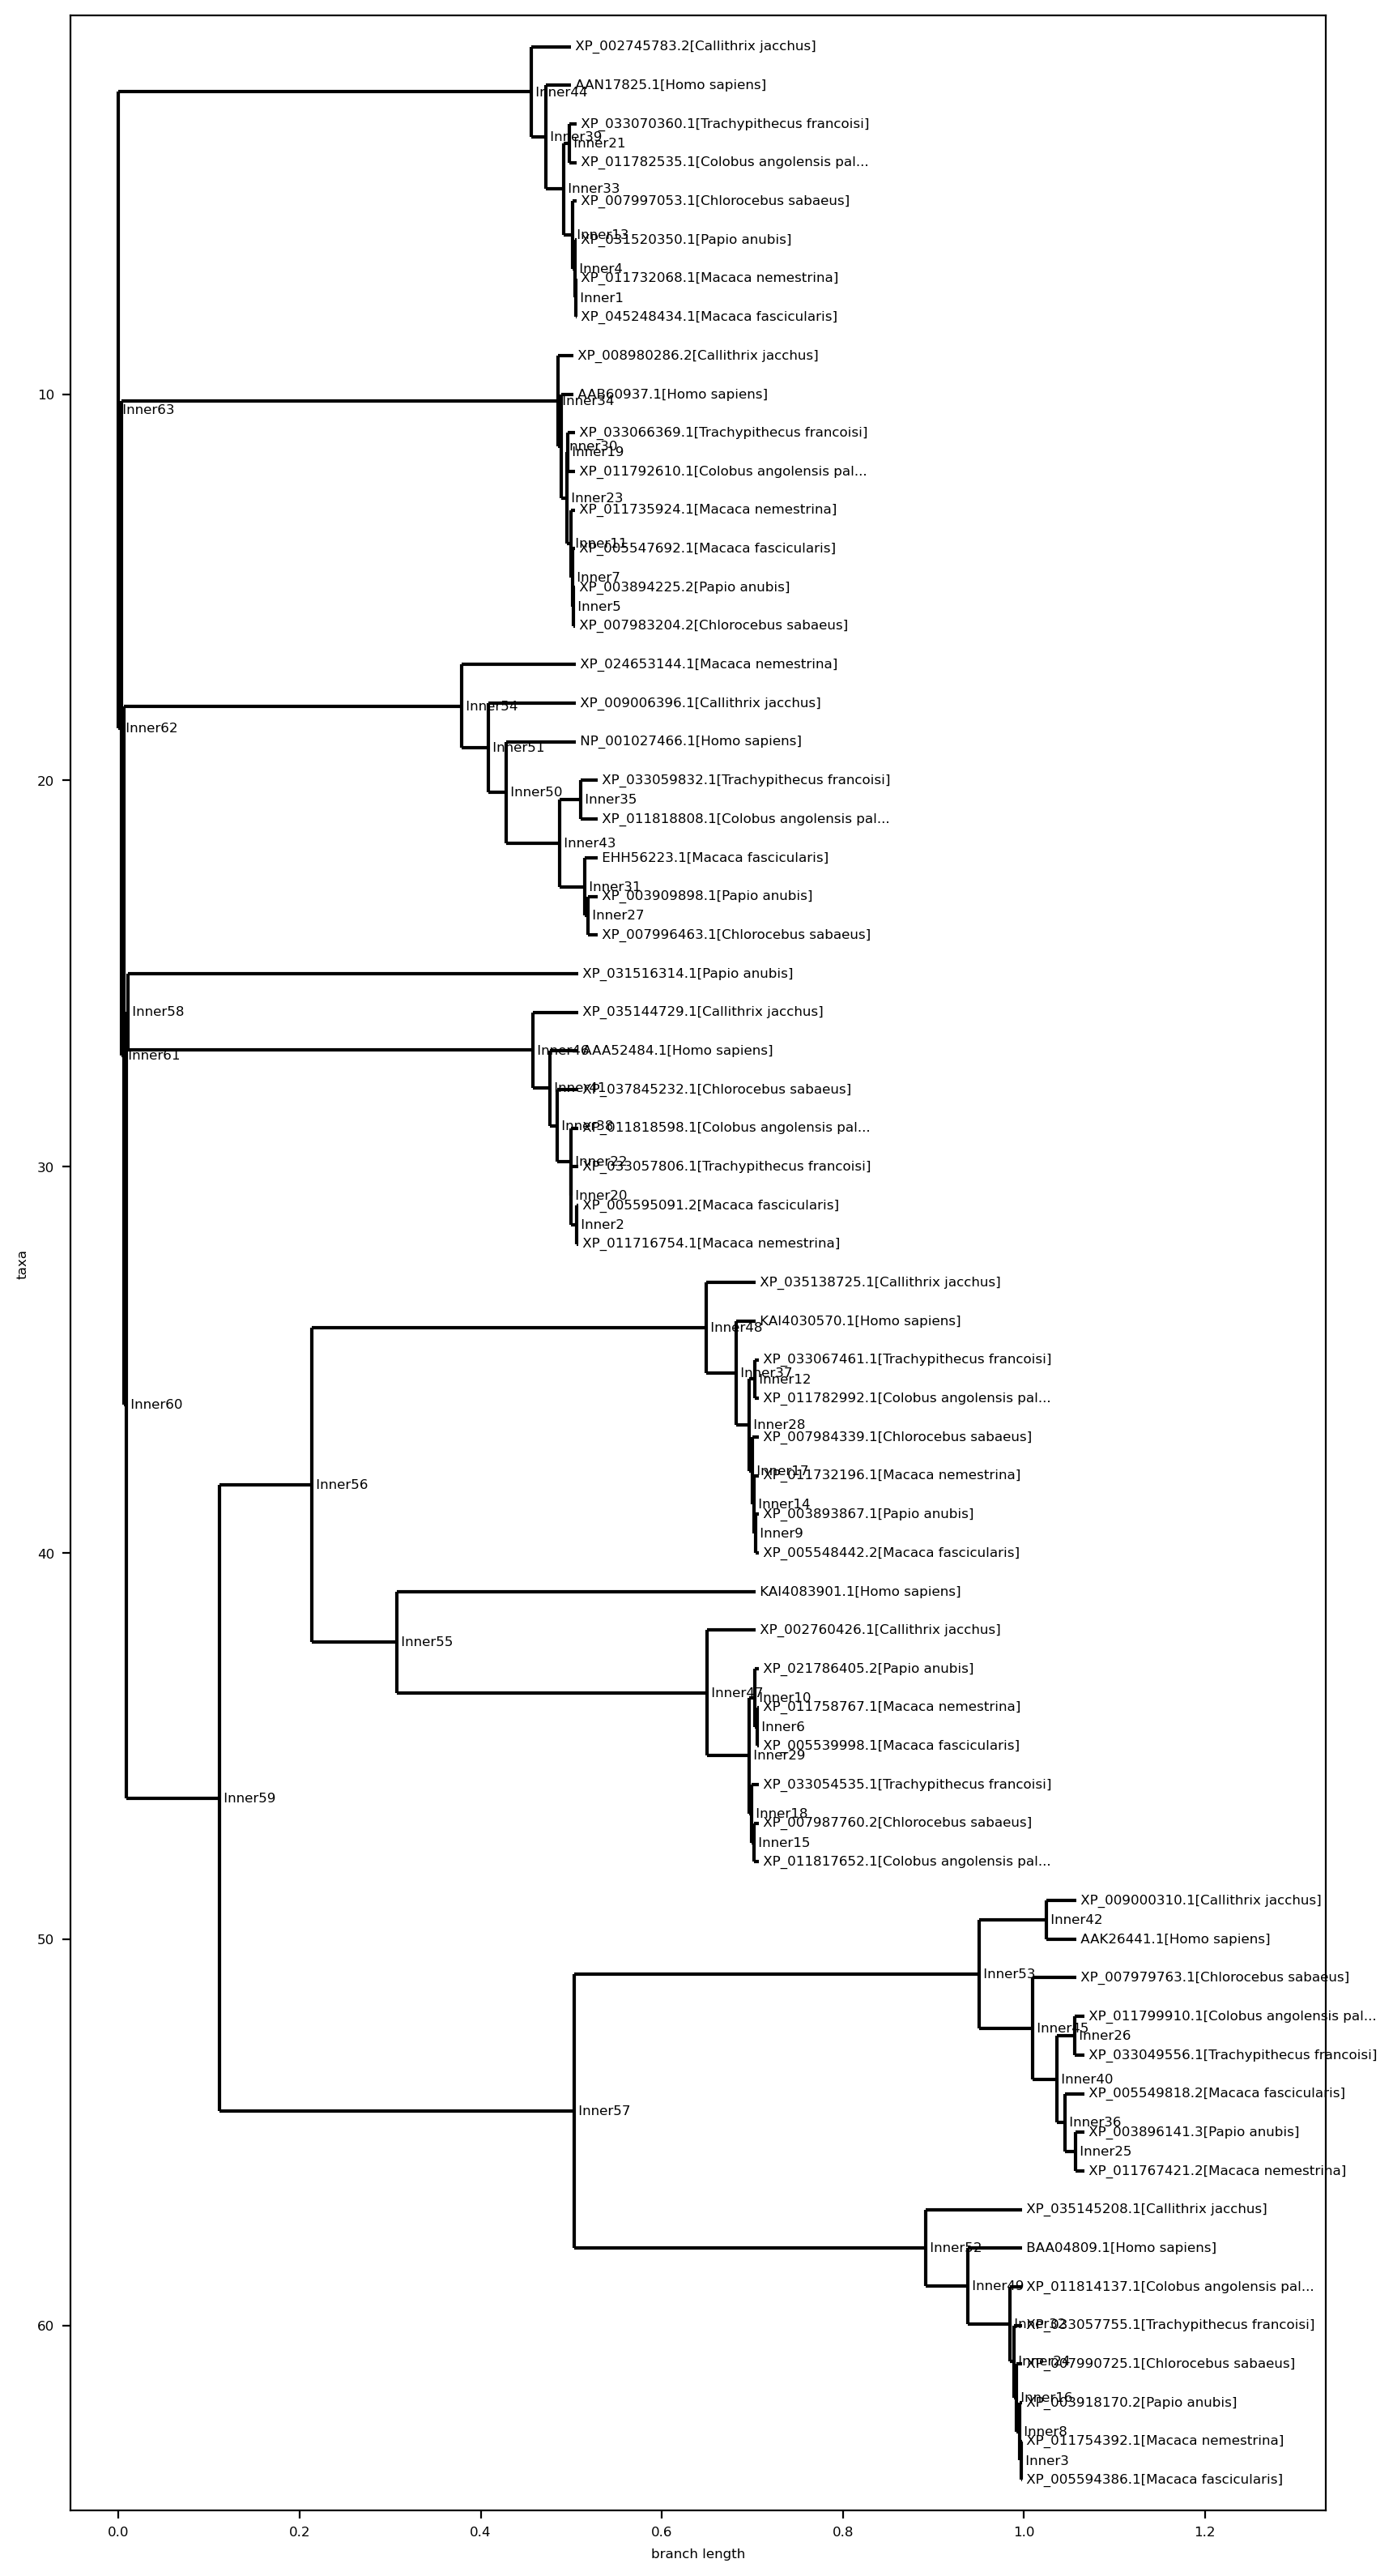

<Figure size 640x480 with 0 Axes>

In [192]:
from Bio import Phylo
from Bio.Phylo import Consensus

# print(result_record_list[0])
name, t = get_tree_from_group()
t.ladderize() 
print("Group Name: ", name)
# Phylo.draw(t, )

import matplotlib
import matplotlib.pyplot as plt
from Bio import Phylo
from io import StringIO

def plot_tree(tree, output_file):
    # handle = StringIO(treedata)  # parse the newick string
    # tree = Phylo.read(handle, "newick")
    matplotlib.rc('font', size=6)
    # set the size of the figure
    fig = plt.figure(figsize=(10, 20), dpi=200)
    # alternatively
    # fig.set_size_inches(10, 20)
    axes = fig.add_subplot(1, 1, 1)
    
    fig1 = plt.gcf()
    # plt.show()
    # plt.draw()
    # fig1.savefig('tessstttyyy.png', dpi=100)

    Phylo.draw(tree, axes=axes)
    plt.savefig(output_file)
    plt.show()

    return
with open("full_tree.jpg", 'wb') as f:
    plot_tree(t, f)

In [209]:
cluster_trees = [get_tree(i) for i in range(8)]

In [193]:
 [get_tree(i) for i in range(8)]

[Tree(rooted=True),
 Tree(rooted=True),
 Tree(rooted=True),
 Tree(rooted=True),
 Tree(rooted=True),
 Tree(rooted=True),
 Tree(rooted=True),
 Tree(rooted=True)]

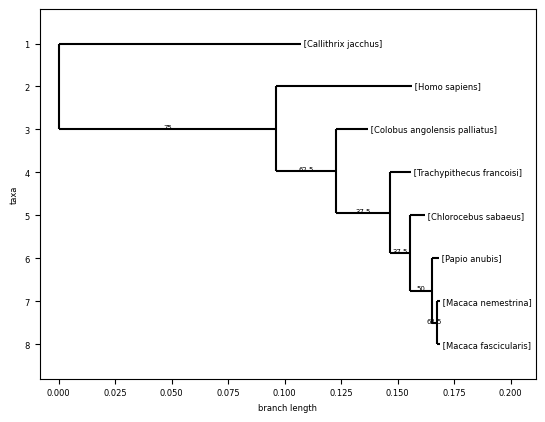

In [199]:
from Bio.Phylo import Consensus
# Bio.Phylo.Consensus
consensus_tree = Phylo.Consensus.majority_consensus( [get_tree_from_group(i)[1] for i in range(8)])
Phylo.draw(consensus_tree)

In [202]:
from Bio.Phylo import Consensus
# Bio.Phylo.Consensus
consensus_tree = Phylo.Consensus.majority_consensus( [get_tree_from_cluster(z_cluster, i)[1] for i in range(8)])
Phylo.draw(consensus_tree)

ValueError: Taxons in provided trees should be consistent

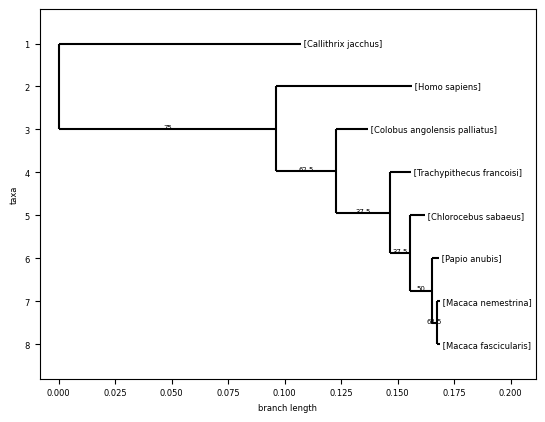

In [198]:
Phylo.draw(consensus_tree)

In [ ]:
from Bio.Phylo import Consensus
# Bio.Phylo.Consensus
consensus_tree = Phylo.Consensus.majority_consensus( [get_tree(i) for i in range(8)])

In [116]:
score_hit_matrix.min()

0.0

In [68]:
len(result_record_list)

64

In [58]:
r.description.split()[-1]

'monax]'

In [60]:
import re
z = re.search(r"\[.*\]", r.description)
# r.description
z.group(0)

'[Marmota monax]'

In [42]:
dir(records[0])

['__add__',
 '__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__le___',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_per_letter_annotations',
 '_seq',
 '_set_per_letter_annotations',
 '_set_seq',
 'annotations',
 'dbxrefs',
 'description',
 'features',
 'format',
 'id',
 'letter_annotations',
 'lower',
 'name',
 'reverse_complement',
 'seq',
 'translate',
 'upper']

In [46]:
records[0].description

'BAA04809.1 collagen [Homo sapiens]'

In [ ]:
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

record = SeqRecord(
    Seq("MKQHKAMIVALIVICITAVVAALVTRKDLCEVHIRTGQTEVAVF"),
    id="YP_025292.1",
    name="HokC",
    description="toxic membrane protein, small",
)


sequences = []  # add code here

for k,v in d.items():
    tmp = SeqRecord(
        Seq("MKQHKAMIVALIVICITAVVAALVTRKDLCEVHIRTGQTEVAVF"),
        id="YP_025292.1",
        name="HokC",
        description="toxic membrane protein, small",
    )
    

with open("example.fasta", "w") as output_handle:
    SeqIO.write(sequences, output_handle, "fasta")

In [21]:
d.keys()

dict_keys(['dataset/BAA04809.1.txt', 'dataset/AAA52484.1.txt', 'dataset/AAK26441.1.txt', 'dataset/NP_001027466.1.txt', 'dataset/KAI4083901.1.txt', 'dataset/AAB60937.1.txt', 'dataset/AAN17825.1.txt', 'dataset/KAI4030570.1.txt'])

In [23]:
d['dataset/KAI4030570.1.txt']

{'[Homo sapiens]': <__main__.GeneStruct at 0x7f9d686ebc50>,
 '[Colobus angolensis palliatus]': <__main__.GeneStruct at 0x7f9d686f2750>,
 '[Macaca fascicularis]': <__main__.GeneStruct at 0x7f9d686f2190>,
 '[Papio anubis]': <__main__.GeneStruct at 0x7f9d686f2110>,
 '[Chlorocebus sabaeus]': <__main__.GeneStruct at 0x7f9d686f2f10>,
 '[Trachypithecus francoisi]': <__main__.GeneStruct at 0x7f9d686f2490>,
 '[Macaca nemestrina]': <__main__.GeneStruct at 0x7f9d686f25d0>,
 '[Callithrix jacchus]': <__main__.GeneStruct at 0x7f9d686f6490>}

In [24]:
d['dataset/AAN17825.1.txt']

{'[Homo sapiens]': <__main__.GeneStruct at 0x7f9d5a475690>,
 '[Macaca fascicularis]': <__main__.GeneStruct at 0x7f9d5a479390>,
 '[Macaca nemestrina]': <__main__.GeneStruct at 0x7f9d5a479110>,
 '[Papio anubis]': <__main__.GeneStruct at 0x7f9d5a4791d0>,
 '[Colobus angolensis palliatus]': <__main__.GeneStruct at 0x7f9d5a479310>,
 '[Chlorocebus sabaeus]': <__main__.GeneStruct at 0x7f9d5a479410>,
 '[Trachypithecus francoisi]': <__main__.GeneStruct at 0x7f9d5a479550>,
 '[Callithrix jacchus]': <__main__.GeneStruct at 0x7f9d5a479950>}

In [12]:
for r in readers:
    print(r.file_name)
    

dataset/AAA52484.1.txt
dataset/BAA04809.1.txt
dataset/AAK26441.1.txt
dataset/AAB60937.1.txt
dataset/AAN17825.1.txt
dataset/NP_001027466.1.txt
dataset/KAI4083901.1.txt
dataset/KAI4030570.1.txt


In [112]:
for org in candidate_organisms:
    if org not in [ gene_struct.organism for gene_struct in readers[0].gene_list]:
        print(org)

[Piliocolobus tephrosceles]


In [51]:
z = [4,1,2,3]
z.remove(2)
z

[4, 1, 3]

In [42]:
organism_set_list = []

for r in readers:
    s = set()
    for gene_struct in r.gene_list:
        s.add(gene_struct.organism)
        # s.add(gene_struct.organism.split(' ')[0][1:])
    organism_set_list.append(s)

In [44]:
organism_count_dict = {}
for organism_set in organism_set_list[1:]:
    for organism in organism_set:
        organism_count_dict[organism] = organism_count_dict.get(organism, 0) + 1

In [45]:
[k for k, v in organism_count_dict.items() if v>=8]

['[Cebus imitator]',
 '[Cercocebus atys]',
 '[Aotus nancymaae]',
 '[Sapajus apella]',
 '[Callithrix jacchus]']